In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action= 'ignore')

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_csv("C:/Users/shafi/Downloads/Wine.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# 2. Try out different clustering models in the wine dataset.


In [7]:
#transformed the dataset to an array so that we can plot the graphs of the clusters
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [8]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
#normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [10]:
X_norm

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

# Kmeans Clustering

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

0.5893776280459064
0.21097561296654618
0.10306150549665624
0.05910073413010722
0.03969232820057103
0.031232108968648222
0.027180954089528406
0.02366466516212028
0.020448724450857585
0.01853787449801328


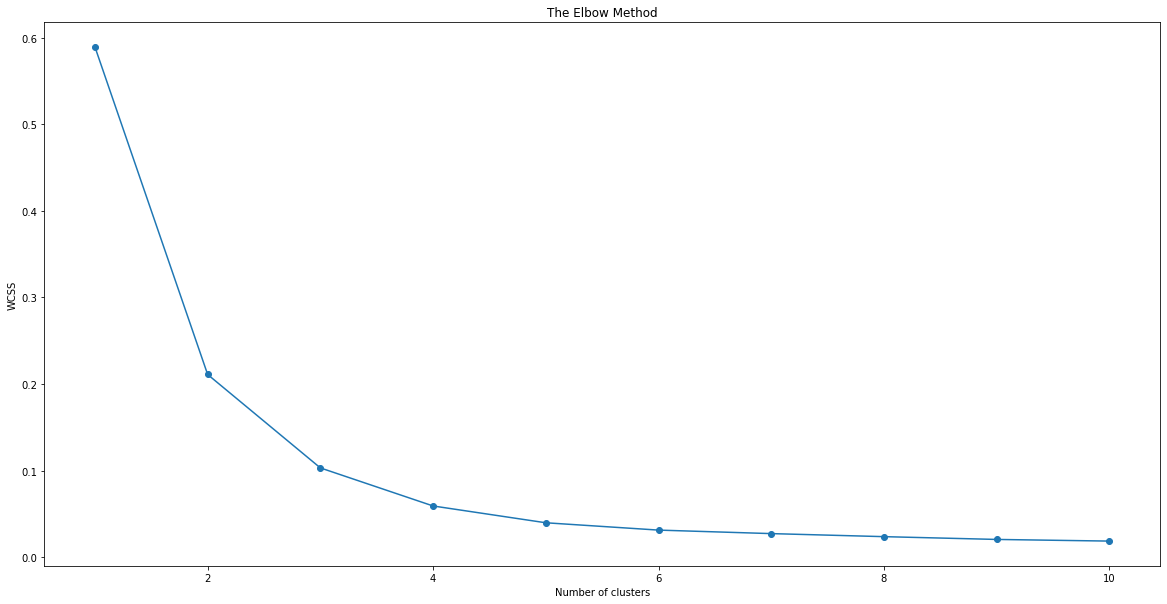

In [13]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters=3

In [14]:
#K means
kmeans = KMeans(n_clusters = 3,init= 'k-means++',random_state=42)
clusters_kmean= kmeans.fit_predict(X_norm)
type(X_norm)
clusters_kmean

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [15]:
kmeans.inertia_

0.10306150549665624

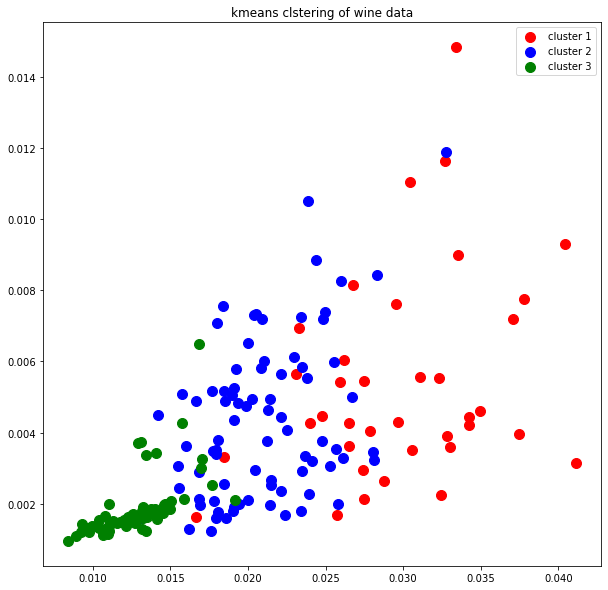

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_kmean==0,0],X_norm[clusters_kmean==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_kmean==1,0],X_norm[clusters_kmean==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_kmean==2,0],X_norm[clusters_kmean==2,1],s=100,c='green',label='cluster 3')

plt.title('kmeans clstering of wine data')

plt.legend()
plt.show()

In [17]:
result= data.copy()
result.drop(result.columns[[2,3,4,5,6,7,8]], axis = 1, inplace = True)
result["Clusters_kmeans"]=clusters_kmean


In [18]:
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans
0,14.23,1.71,5.64,1.04,3.92,1065,2
1,13.20,1.78,4.38,1.05,3.40,1050,2
2,13.16,2.36,5.68,1.03,3.17,1185,2
3,14.37,1.95,7.80,0.86,3.45,1480,2
4,13.24,2.59,4.32,1.04,2.93,735,1


# HC model

In [19]:
import scipy.cluster.hierarchy as sch

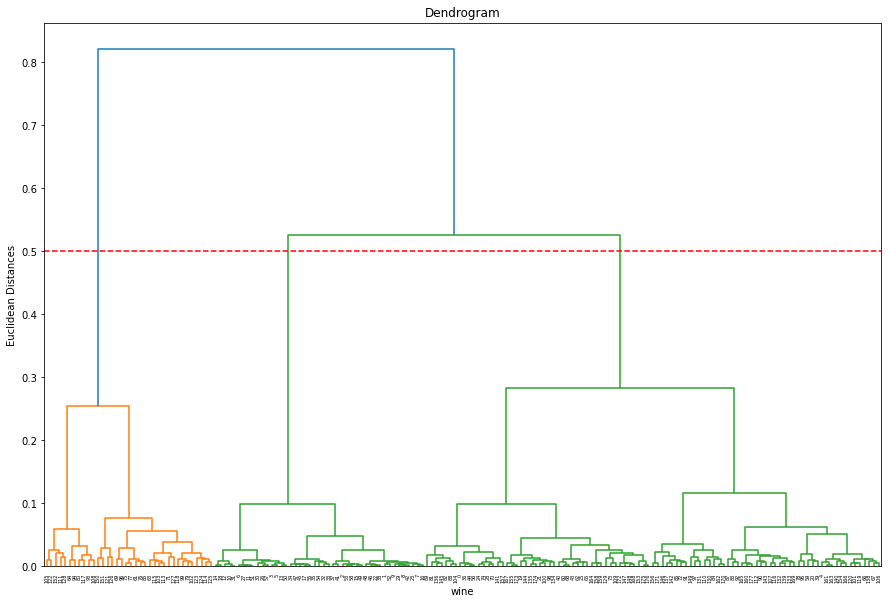

In [20]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram (sch.linkage(X_norm,method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean Distances')
plt.hlines(0.5,0,5000,colors ="r",linestyles = "dashed")
plt.show()

optimum number of clusters = 3

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ='ward')
clusters_hc=hc.fit_predict(X_norm)

In [22]:
clusters_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

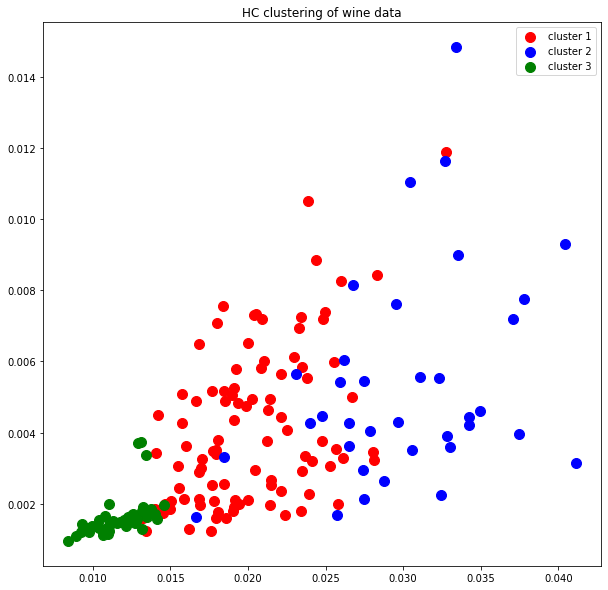

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(X_norm[clusters_hc==0,0],X_norm[clusters_hc==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_norm[clusters_hc==1,0],X_norm[clusters_hc==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_norm[clusters_hc==2,0],X_norm[clusters_hc==2,1],s=100,c='green',label='cluster 3')

plt.title('HC clustering of wine data')

plt.legend()
plt.show()

In [24]:
result["Clusters_HC"]=clusters_hc

In [25]:
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,Clusters_HC
0,14.23,1.71,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,4.38,1.05,3.40,1050,2,2
2,13.16,2.36,5.68,1.03,3.17,1185,2,2
3,14.37,1.95,7.80,0.86,3.45,1480,2,2
4,13.24,2.59,4.32,1.04,2.93,735,1,0


# PCA

In [26]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X_norm)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.609200e-16,1.097749e-16,-2.139362e-16,-1.035377e-16,-2.759965e-16,1.295780e-16,1.553065e-16,-1.571776e-16,-1.108859e-16,1.921060e-16,-7.422278e-17,2.744372e-17,4.812006e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.578276e+00,-1.110345e+00,-1.545862e+00,-1.598474e+00,-1.620544e+00,-1.422479e+00,-1.299950e+00,-1.336901e+00,-1.478834e+00,-1.331212e+00,-1.223578e+00,-1.175129e+00,-3.405552e+00
25%,-8.769390e-01,-8.135608e-01,-9.152740e-01,-9.234559e-01,-7.744597e-01,-6.880132e-01,-6.824559e-01,-9.319392e-01,-7.071486e-01,-7.123828e-01,-6.915696e-01,-7.390277e-01,-4.311961e-01
50%,-1.324045e-01,-2.156901e-01,-1.254777e-01,-7.440602e-02,-8.833101e-02,-3.234369e-01,-1.401961e-01,-2.039306e-01,-2.938237e-01,-3.552385e-01,-3.342087e-01,-3.089175e-01,2.412533e-01
75%,6.619797e-01,5.097093e-01,6.132834e-01,6.073452e-01,5.848608e-01,2.874968e-01,3.214203e-01,7.728810e-01,5.169771e-01,3.944055e-01,4.864691e-01,4.440916e-01,7.513150e-01
max,2.897822e+00,4.471356e+00,2.605855e+00,2.637039e+00,2.714998e+00,3.223743e+00,4.220922e+00,4.377913e+00,4.073050e+00,3.792935e+00,4.428520e+00,3.479497e+00,1.176472e+00


In [27]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 2)

Text(0, 0.5, 'PC2')

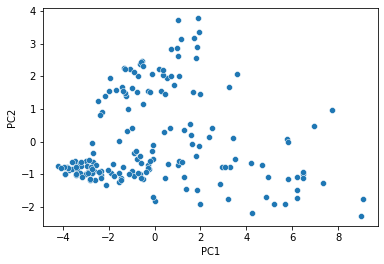

In [28]:
sns.scatterplot(x_pca[:,0],x_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [29]:
# displaying the PCA components
pca.components_

array([[ 0.32387845,  0.19618729,  0.3216126 ,  0.31726122,  0.31609893,
         0.29434282,  0.23886663,  0.24672147,  0.26491554,  0.0936324 ,
         0.28466182,  0.29605438, -0.31687719],
       [ 0.12564747,  0.37092553,  0.13981921,  0.14819043,  0.10270796,
        -0.24386945, -0.42801893,  0.29559868, -0.23234704,  0.53627283,
        -0.20986961, -0.27628232, -0.05065826]])

# Kmeans  using principal components

In [30]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

1908.8674719766664
862.9625522522333
466.9434053075363
317.06963265752637
226.8015496990439
167.15407976834013
141.81268449461692
126.88429842797862
114.22445533069126
99.83964155010588


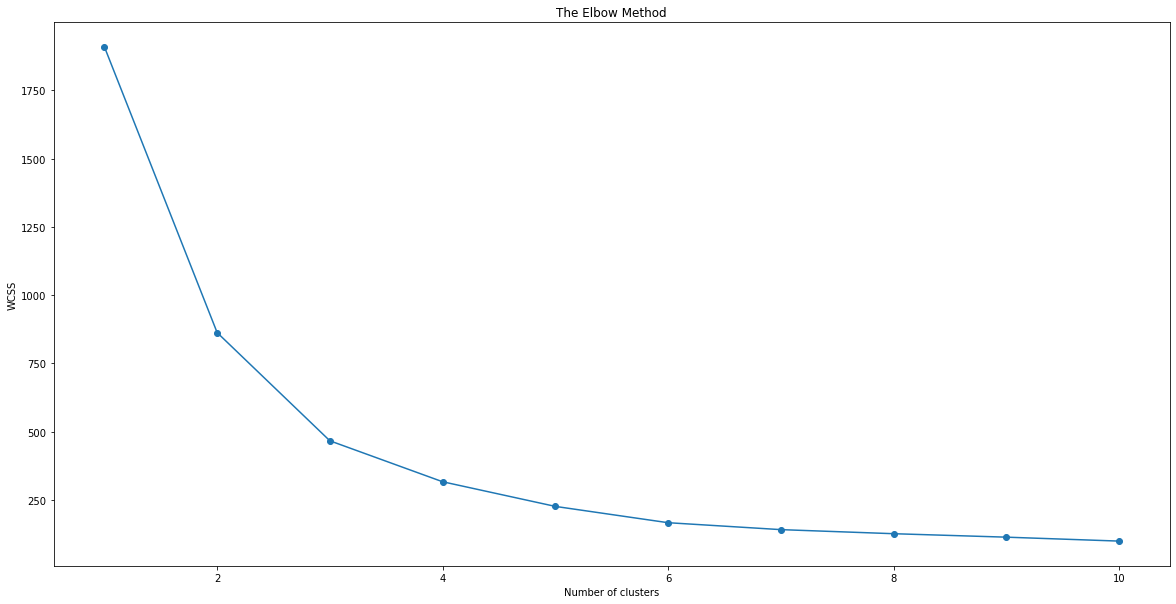

In [31]:
plt.figure(figsize=(20,10))
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters =3

In [32]:
#K means
kmeans = KMeans(n_clusters = 3,init= 'k-means++',random_state=42)
clusters_kmean_pca= kmeans.fit_predict(x_pca)
type(x_pca)
clusters_kmean_pca

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2])

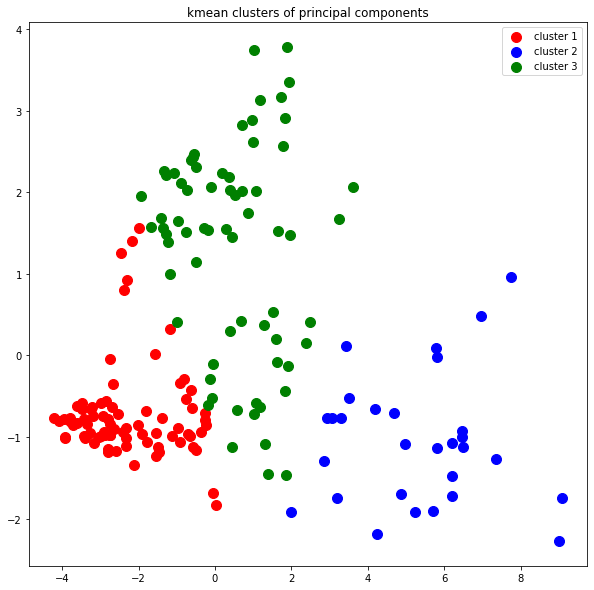

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[clusters_kmean_pca==0,0],x_pca[clusters_kmean_pca==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x_pca[clusters_kmean_pca==1,0],x_pca[clusters_kmean_pca==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x_pca[clusters_kmean_pca==2,0],x_pca[clusters_kmean_pca==2,1],s=100,c='green',label='cluster 3')

plt.title('kmean clusters of principal components')

plt.legend()
plt.show()

In [34]:
result["Clusters_kmeans_pca"]=clusters_kmean_pca

In [35]:
result.head(10)

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,Clusters_HC,Clusters_kmeans_pca
0,14.23,1.71,5.64,1.04,3.92,1065,2,0,0
1,13.20,1.78,4.38,1.05,3.40,1050,2,2,0
2,13.16,2.36,5.68,1.03,3.17,1185,2,2,0
3,14.37,1.95,7.80,0.86,3.45,1480,2,2,0
4,13.24,2.59,4.32,1.04,2.93,735,1,0,2
5,14.20,1.76,6.75,1.05,2.85,1450,2,2,0
6,14.39,1.87,5.25,1.02,3.58,1290,2,2,0
7,14.06,2.15,5.05,1.06,3.58,1295,2,2,0
8,14.83,1.64,5.20,1.08,2.85,1045,2,2,0
9,13.86,1.35,7.22,1.01,3.55,1045,2,2,0


# HC using principal components

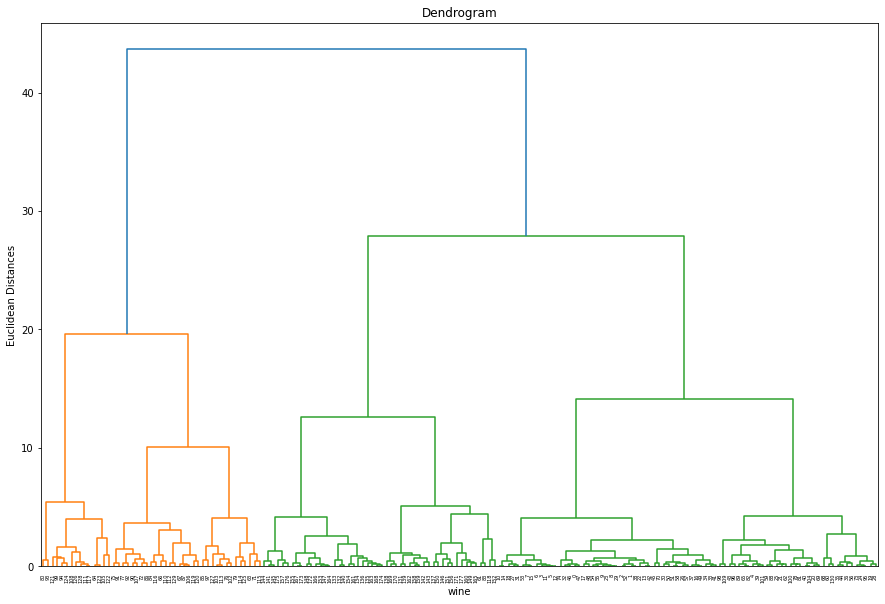

In [36]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram (sch.linkage(x_pca,method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean Distances')

plt.show()

optimum nomber of clusters =3

In [37]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ='ward')
clusters_hc_pca=hc.fit_predict(x_pca)

In [38]:
clusters_hc_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

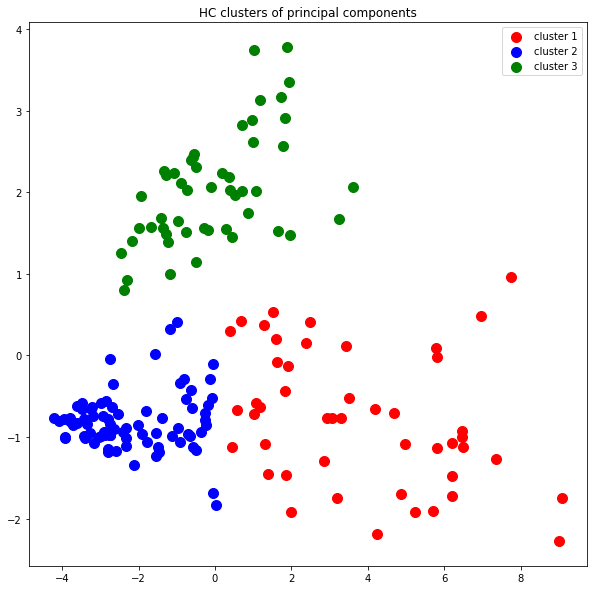

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[clusters_hc_pca==0,0],x_pca[clusters_hc_pca==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x_pca[clusters_hc_pca==1,0],x_pca[clusters_hc_pca==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x_pca[clusters_hc_pca==2,0],x_pca[clusters_hc_pca==2,1],s=100,c='green',label='cluster 3')

plt.title('HC clusters of principal components')

plt.legend()
plt.show()

In [40]:
result["Clusters_hc_pca"]=clusters_hc_pca

In [41]:
result.head()

,Alcohol,Malic_Acid,Color_Intensity,Hue,OD280,Proline,Clusters_kmeans,Clusters_HC,Clusters_kmeans_pca,Clusters_hc_pca
0,14.23,1.71,5.64,1.04,3.92,1065,2,0,0,1
1,13.20,1.78,4.38,1.05,3.40,1050,2,2,0,1
2,13.16,2.36,5.68,1.03,3.17,1185,2,2,0,1
3,14.37,1.95,7.80,0.86,3.45,1480,2,2,0,1
4,13.24,2.59,4.32,1.04,2.93,735,1,0,2,1


# Found the optimum number of clusters in each model and created the model with the optimum number of clusters.